## Практическое задание

Вариант 1. (простой)

- обучить сверточную нейронную сеть в стиле AlexNet (с падением размера ядра свертки и последовательностью блоков свертка-пулинг  (conv-pool)-(conv-pool)-...) на датасете fashion-mnist
- оценить рост точности при увеличении ширины сети (больше ядер)
- оценить рост точности при увеличении глубины сети (больше слоев)
- сравнить с точностью полносвязной сети для этой выборки

In [87]:
from __future__ import print_function
#import tensorflow.keras as keras # расскоментируйте эту строку, чтобы начать обучение
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import os

import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
import numpy as np

In [88]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

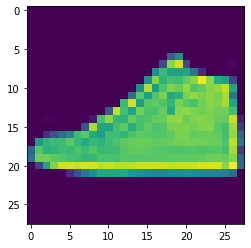

In [89]:
plt.imshow(x_train[1501,:,:])
plt.show()

In [90]:
param_dict = dict()

In [91]:
param_dict.update({'num_pixels': len(x_train[1501][0])})
print(f'Количество пикселей { param_dict["num_pixels"] }')

Количество пикселей 28


In [92]:
# Кол-во классов
classes = set(y_train)
param_dict['num_classes'] = len(classes)
print(f'Кол-во классов {param_dict["num_classes"]} - {classes}')

Кол-во классов 10 - {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


In [93]:
# Normalize the images.
x_train = (x_train / 127) - 1
x_test = (x_test / 127) - 1

# Flatten the images.
x_train = x_train.reshape((-1, 784))
x_test = x_test.reshape((-1, 784))

print(x_train.shape) # (60000, 784)
print(x_test.shape)  # (10000, 784)

(60000, 784)
(10000, 784)


In [94]:
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [99]:
param_dict['batch_size'] = 32
param_dict['num_classes']  = 10
param_dict['epochs']  = 5
param_dict['data_augmentation']  = False
param_dict['num_predictions']  = 20

param_dict['x_train'] = x_train 
param_dict['x_test'] = x_test

param_dict['y_train'] = y_train
param_dict['y_test'] = y_test

In [100]:
def create_fit_model(param_dict):
  # конфигурирование слоев нейросети
  model = Sequential()

  # слои нейросети отвественные за свертку и max-pooling
  # model.add(Conv2D(param_dict['num_pixels'], (3, 3), padding='same',
  #                 input_shape=x_train.shape[1:]))
  model.add(layers.experimental.preprocessing.Resizing(224, 224, interpolation="bilinear", input_shape=param_dict['x_train'].shape[1:]))
  model.add(Activation('relu'))
  model.add(Conv2D(param_dict['num_pixels'], (3, 3)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout( 0.25))

  model.add(Conv2D(64, (3, 3), padding='same'))
  model.add(Activation('relu'))
  model.add(Conv2D(64, (3, 3)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  # полносвязные слои нейронной сети
  model.add(Flatten())
  model.add(Dense(512))
  model.add(Activation('relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes))
  model.add(Activation('softmax'))

  # инициализация RMSprop optimizer
  #opt = tensorflow.keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

  # компиляция модели
  model.compile(loss='categorical_crossentropy',
                optimizer='SGD',
                metrics=['accuracy'])

  if not param_dict['data_augmentation']:
      print('Не используется data augmentation')
      model.fit(param_dict['x_train'], param_dict['y_train'],
                batch_size=param_dict['batch_size'],
                epochs=param_dict['epochs'],
                validation_data=(param_dict['x_test'], 
                                 param_dict['y_test']),
                shuffle=True)
  else:
      print('Использование data augmentation в реальном времени')
      # Препроцессинг и data augmentation в реальном времени:
      datagen = ImageDataGenerator(
          featurewise_center=False,
          samplewise_center=False,
          featurewise_std_normalization=False,
          samplewise_std_normalization=False,
          zca_whitening=False, 
          zca_epsilon=1e-06, 
          rotation_range=0, 
          width_shift_range=0.1,
          height_shift_range=0.1,
          shear_range=0., 
          zoom_range=0., 
          channel_shift_range=0.,
          fill_mode='nearest',
          cval=0.,
          horizontal_flip=True,
          vertical_flip=False,
          rescale=None,
          preprocessing_function=None,
          data_format=None,
          validation_split=0.0)

      # запуск data augmentation через fit
      #datagen.fit(x_train)

      # запуск data augmentation через fit_generator
      model.fit_generator(datagen.flow(
          param_dict['x_train'], 
          param_dict['y_train'],
          batch_size=param_dict['batch_size']),
                          epochs=param_dict['epochs'],
                          validation_data=(param_dict['x_test'], 
                                           param_dict['y_test']),
                          workers=4)
  # проверка работы обученной модели
  scores = model.evaluate(x_test, y_test, verbose=1)
  print('Test loss:', scores[0])
  print('Test accuracy:', scores[1])
    

In [101]:
create_fit_model(param_dict)

ValueError: ignored

In [102]:
  # конфигурирование слоев нейросети
  model = Sequential()

In [103]:
model.add(Conv2D(param_dict['num_pixels'], (3, 3), padding='same',
                 input_shape=param_dict['x_train'].shape[1:]))

ValueError: ignored

In [84]:
# слои нейросети отвественные за свертку и max-pooling
from tensorflow.keras import models, layers, losses, datasets
model.add(layers.experimental.preprocessing.Resizing(224, 224, interpolation="bilinear", input_shape=x_train.shape[1:]))